In [25]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt



In [26]:
epoch = 1
batch_size = 50
lr = 0.001
download_mnist = False


torch.Size([60000, 28, 28])
torch.Size([60000])


D:\Setup\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\Setup\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


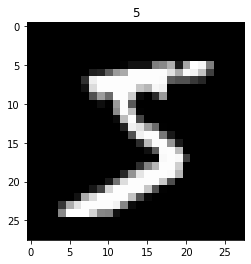

In [27]:
#下载dataset
train_data = torchvision.datasets.MNIST(
    root='./data', #存储路径
    train = True, #下载训练集
    transform = torchvision.transforms.ToTensor(),#将数据集改成tensor格式 将图片中的像素值从（0-255）压缩至（0-1）
    download = download_mnist
)

#绘图
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()


In [28]:
train_loader = Data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True,num_workers=2)
#提取的是test_data
test_data = torchvision.datasets.MNIST('./data/',train=False)

#提取test_data中的test_data
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.

test_y = test_data.test_labels[:2000] #只取前2000个

#建立cnn网络
class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN,self).__init__()
        self.conv1 = nn.Sequential(
            #卷积层（过滤器）：长和宽规定了单次在图片多大区域提取，高规定区域的信息特征种类数量
            nn.Conv2d(         #输入的图片（1,,28,28) --> (维数，长，宽)
                in_channels=1, #图片高度（维数、层数)
                out_channels=16, #卷积核个数
                kernel_size=5,#卷积核的大小（长宽相同）
                stride=1,#卷积核的单次跳度
                padding=2,# if stride = 1,padding = (kernel_size-1)/2 = (5-1)/2  
            ),  #--> (16,28,28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),#筛选区域的重要信息  --->(16,14,14)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2),#输入16层，输出为32，核数5，步距1，padding2  ---> (32,14,14)
            nn.ReLU(),
            nn.MaxPool2d(2) #最大池化   --->(32,7,7)
        )
        
        
        self.out = nn.Linear(32 * 7 * 7 , 10) #输出为10，有10个类别

    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)   #(batch,32,7,7)
        x = x.view(x.size(0),-1)   #(batch,32*7*7)
        output = self.out(x)
        return output , x


cnn = CNN()
optimizer = torch.optim.Adam(cnn.parameters(),lr=lr)
loss_func = nn.CrossEntropyLoss()

# 训练过程
for epoch in range(epoch):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients



# print 10 predictions from test data
#真实值
test_output, _ = cnn(test_x[:10])
#预测值
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')


D:\Setup\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Setup\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
